In [ ]:
# Layer 1 - Client Feature Analysis

In [6]:
# Data gathering
import pandas as pd
import msoffcrypto
import io

def load_encrypted_excel(file_path: str, password: str) -> pd.DataFrame:
    with open(file_path, 'rb') as f:
        office_file = msoffcrypto.OfficeFile(f)
        office_file.load_key(password=password)
        decrypted = io.BytesIO()
        office_file.decrypt(decrypted)
        decrypted.seek(0)
        return pd.read_excel(decrypted)

# File configurations
files = [
    # Core Client & FNA Process Tables
    {"name": "client", "path": "client.xlsx", "password": "_XlN@a9)EVy1"},
    {"name": "emfc2fna", "path": "emfc2fna.xlsx", "password": "dQq9T%pC^?22"},
    {"name": "emfc2personalinformation", "path": "emfc2personalinformation.xlsx", "password": "(ZuUpT69WVCR"},
    {"name": "emfc2", "path": "emfc2.xlsx", "password": "79GYEd%l(2Bf"},
    {"name": "EMFC2Assets", "path": "EMFC2Assets.xlsx", "password": "!suNZ=%YA13k"},
    {"name": "emfc2portofolioinsurance", "path": "emfc2portofolioinsurance.xlsx", "password": "BcxM>wz*(hxF"},

    # Product & Solution Workflow
    {"name": "emfc2productsolution", "path": "emfc2productsolution.xlsx", "password": "mcZ4KQ$&d*?u"},
    {"name": "emfc2productsolutiondetail", "path": "emfc2productsolutiondetail.xlsx", "password": "Y$cbGx+75BUx"},
    {"name": "EMFC2ProductIntegrationApplication", "path": "EMFC2ProductIntegrationApplication.xlsx", "password": "(FZsw7#vz-bN"},
    {"name": "EMFC2ProductIntegrationLog", "path": "EMFC2ProductIntegrationLog.xlsx", "password": "?wcAx*P4n=9&"},

    # Product & Category Lookup Tables
    {"name": "ProductMainPlan", "path": "ProductMainPlan.xlsx", "password": ")XQ4ZDssowrA"},
    {"name": "ProductType", "path": "ProductType.xlsx", "password": "#9zCw?^-xTO?"},
    {"name": "ProductCategory", "path": "ProductCategory.xlsx", "password": "#F)cdAEOVJ@4"},
    {"name": "productsubcategory", "path": "productsubcategory.xlsx", "password": "y-^t$N9>%S%C"}
]

# Load all datasets into memory
datasets = {}

print("=== LOADING ALL DATASETS ===")
for file in files:
    print(f"Loading {file['name']}...", end=" ")
    try:
        datasets[file['name']] = load_encrypted_excel(file["path"], file["password"])
        shape = datasets[file['name']].shape
        print(f"✓ ({shape[0]:,} rows, {shape[1]} columns)")
    except Exception as e:
        print(f"✗ Error: {e}")

print(f"\nSuccessfully loaded {len(datasets)} datasets")
print("Available datasets:", list(datasets.keys()))


=== LOADING ALL DATASETS ===
Loading client... ✓ (45,688 rows, 49 columns)
Loading emfc2fna... ✓ (51,772 rows, 31 columns)
Loading emfc2personalinformation... ✓ (51,837 rows, 37 columns)
Loading emfc2... ✓ (51,769 rows, 8 columns)
Loading EMFC2Assets... ✓ (50,500 rows, 39 columns)
Loading emfc2portofolioinsurance... ✓ (27,437 rows, 25 columns)
Loading emfc2productsolution... ✓ (61,733 rows, 25 columns)
Loading emfc2productsolutiondetail... ✓ (154,286 rows, 5 columns)
Loading EMFC2ProductIntegrationApplication... ✓ (560 rows, 14 columns)
Loading EMFC2ProductIntegrationLog... ✓ (977 rows, 21 columns)
Loading ProductMainPlan... ✓ (1,532 rows, 22 columns)
Loading ProductType... ✓ (4 rows, 8 columns)
Loading ProductCategory... ✓ (10 rows, 6 columns)
Loading productsubcategory... ✓ (39 rows, 13 columns)

Successfully loaded 14 datasets
Available datasets: ['client', 'emfc2fna', 'emfc2personalinformation', 'emfc2', 'EMFC2Assets', 'emfc2portofolioinsurance', 'emfc2productsolution', 'emfc2produ

In [7]:
print("\\n=== COLUMN HEADERS FOR EACH DATASET ===\\n")
for name, df in datasets.items():
    print(f"📄 Dataset: {name}")
    print(f"🧾 Columns ({len(df.columns)}):")
    for col in df.columns:
        print(f"  - {col} ({df[col].dtype})")
    print("-" * 40)


\n=== COLUMN HEADERS FOR EACH DATASET ===\n
📄 Dataset: client
🧾 Columns (49):
  - # (int64)
  - ClientId (object)
  - ClientName (object)
  - ClientMobileNumber (object)
  - ClientMNVerified (bool)
  - ClientMNVeriCode (float64)
  - ClientMNVeriCodeTime (datetime64[ns])
  - ClientEmail (object)
  - ClientContactPreferences (object)
  - ClientGender (object)
  - ClientDOB (datetime64[ns])
  - ClientCPFContributionCategoryId (object)
  - IDNumber (object)
  - Nationality (object)
  - SpokenLanguage (object)
  - WrittenLanguage (object)
  - Education (object)
  - EmploymentStatus (object)
  - Occupation (object)
  - MaritalStatus (object)
  - PrimaryAddress (object)
  - CorrespondingAddress (object)
  - IncomeRange (object)
  - AccompaniedbyTrustedIndividual (float64)
  - ClientInvitedDate (datetime64[ns])
  - ClientStatus (object)
  - RiskProfile (object)
  - RiskProfileSubmissionDate (datetime64[ns])
  - CKAProfile (object)
  - CARProfile (object)
  - CKACARSubmissionDate (datetime64[ns

In [2]:
print("=== COMPLETE UNIFIED DATASET CREATION WITH INSURANCE PORTFOLIO ===")

import pandas as pd
import numpy as np
from datetime import datetime

def load_encrypted_excel(file_path: str, password: str) -> pd.DataFrame:
    with open(file_path, 'rb') as f:
        office_file = msoffcrypto.OfficeFile(f)
        office_file.load_key(password=password)
        decrypted = io.BytesIO()
        office_file.decrypt(decrypted)
        decrypted.seek(0)
        return pd.read_excel(decrypted)

# Load all datasets
files = [
    {"name": "client", "path": "client.xlsx", "password": "_XlN@a9)EVy1"},
    {"name": "emfc2personalinformation", "path": "emfc2personalinformation.xlsx", "password": "(ZuUpT69WVCR"},
    {"name": "emfc2", "path": "emfc2.xlsx", "password": "79GYEd%l(2Bf"},
    {"name": "EMFC2Assets", "path": "EMFC2Assets.xlsx", "password": "!suNZ=%YA13k"},
    {"name": "emfc2portofolioinsurance", "path": "emfc2portofolioinsurance.xlsx", "password": "BcxM>wz*(hxF"},
]

datasets = {}
print("=== LOADING CORE DATASETS ===")
for file in files:
    print(f"Loading {file['name']}...", end=" ")
    try:
        datasets[file['name']] = load_encrypted_excel(file["path"], file["password"])
        shape = datasets[file['name']].shape
        print(f"✓ ({shape[0]:,} rows, {shape[1]} columns)")
    except Exception as e:
        print(f"✗ Error: {e}")

def create_unified_dataset_with_portfolio(datasets):
    """Create unified dataset including insurance portfolio analysis"""
    
    print("\n🚀 Starting unified dataset creation with insurance portfolio...")
    start_time = datetime.now()
    
    # Step 1: Get base datasets
    client_df = datasets['client'].copy()
    personal_df = datasets['emfc2personalinformation'].copy()
    emfc2_df = datasets['emfc2'].copy()
    assets_df = datasets['EMFC2Assets'].copy()
    portfolio_df = datasets['emfc2portofolioinsurance'].copy()
    
    print(f"📊 Input datasets:")
    print(f"   Client: {len(client_df):,} records")
    print(f"   Personal Info: {len(personal_df):,} records")
    print(f"   EMFC2: {len(emfc2_df):,} records")
    print(f"   Assets: {len(assets_df):,} records")
    print(f"   Insurance Portfolio: {len(portfolio_df):,} records")
    
    # Step 2: Start with client as base
    unified_df = client_df.copy()
    print(f"\n🏗️  Base dataset: {len(unified_df):,} client records")
    
    # Step 3: Add unique columns from personal info
    print(f"\n📝 Adding unique columns from emfc2personalinformation...")
    personal_unique_cols = ['PersonalInformationId', 'EMFC2FNAId', 'ClientAge', 'ClientRetrieval']
    
    personal_merge_cols = ['ClientId'] + personal_unique_cols
    available_personal_cols = [col for col in personal_merge_cols if col in personal_df.columns]
    
    unified_df = unified_df.merge(
        personal_df[available_personal_cols],
        on='ClientId',
        how='left',
        suffixes=('', '_personal')
    )
    
    for col in personal_unique_cols:
        if col in available_personal_cols:
            print(f"   ✅ Added: {col}")
    
    # Step 4: Smart replacement for overlapping columns
    print(f"\n🔄 Smart replacement for better quality columns...")
    overlap_cols = [
        'ClientGender', 'IncomeRange', 'MaritalStatus', 'Education', 
        'EmploymentStatus', 'RiskProfile', 'CKAProfile', 'CARProfile',
        'Nationality', 'SpokenLanguage', 'WrittenLanguage'
    ]
    
    for col in overlap_cols:
        # If the column exists in both personal and unified datasets (client + additional collumns from personaldf), replace missing values
        if col in personal_df.columns and col in unified_df.columns:
            personal_updates = personal_df[['ClientId', col]].dropna()
            
            if len(personal_updates) > 0:
                updated_count = 0
                for _, row in personal_updates.iterrows():
                    client_id = row['ClientId']
                    new_value = row[col]
                    
                    mask = unified_df['ClientId'] == client_id
                    if mask.any():
                        null_mask = mask & unified_df[col].isnull()
                        if null_mask.any():
                            unified_df.loc[null_mask, col] = new_value
                            updated_count += null_mask.sum()
                
                if updated_count > 0:
                    print(f"   🔄 {col}: Updated {updated_count:,} missing values")
    
    # Step 5: Add EMFC2Id bridge
    print(f"\n🌉 Adding EMFC2Id bridge...")
    emfc2_bridge = emfc2_df.sort_values(['ClientId', 'EMFCSubmitDate'], na_position='last')
    emfc2_bridge = emfc2_bridge.groupby('ClientId').agg({
        'EMFC2Id': 'last',
        'EMFCStartDate': 'last',
        'EMFCSubmitDate': 'last',
        'EMFCStatus': 'last'
    }).reset_index()
    
    unified_df = unified_df.merge(emfc2_bridge, on='ClientId', how='left')
    clients_with_emfc2 = unified_df['EMFC2Id'].notna().sum()
    print(f"   ✅ Clients with EMFC2 sessions: {clients_with_emfc2:,}")
    
    # Step 6: Add financial assets
    print(f"\n💰 Adding financial assets...")
    asset_cols = [
        'EMFC2Id', 'SavingsAccounts', 'FixedDepositsAccount', 'HomeAsset', 
        'MotorAsset', 'InsuranceCashValues', 'StocksPortofolio', 'BondPortofolio',
        'UTFEquityAsset', 'ETFs', 'InvestmentProperties', 'CPFOABalance', 
        'CPFSABalance', 'CPFMABalance', 'SRSEquityAsset'
    ]
    
    available_asset_cols = [col for col in asset_cols if col in assets_df.columns]
    unified_df = unified_df.merge(assets_df[available_asset_cols], on='EMFC2Id', how='left')
    
    clients_with_assets = unified_df[available_asset_cols[1:]].notna().any(axis=1).sum()
    print(f"   ✅ Clients with asset data: {clients_with_assets:,}")
    
    # Step 7: Add insurance portfolio analysis
    print(f"\n🛡️  ANALYZING INSURANCE PORTFOLIO...")
    
    # Portfolio analysis by EMFC2Id
    portfolio_analysis = portfolio_df.groupby('EMFC2Id').agg({
        'PolicyNumber': 'count',  # Total policies
        'PlanType': lambda x: list(x.dropna().unique()),  # Unique plan types
        'SumAssuredforLossofLife': 'sum',  # Total life coverage
        'SumAssuredforTPD': 'sum',  # Total TPD coverage
        'SumAssuredforCI': 'sum',  # Total CI coverage
        'SumAssuredforHospitalIncome': 'sum',  # Total hospital income
        'SumAssuredforLongTermCare': 'sum',  # Total LTC coverage
        'AnnualCashPremium': 'sum',  # Total annual premium
        'InsurerCompanyName': lambda x: list(x.dropna().unique())  # Insurance companies
    }).reset_index()
    
    # Rename columns for clarity
    portfolio_analysis.columns = [
        'EMFC2Id', 'Total_Policies', 'Plan_Types', 'Total_Life_Coverage',
        'Total_TPD_Coverage', 'Total_CI_Coverage', 'Total_Hospital_Income',
        'Total_LTC_Coverage', 'Total_Annual_Premium', 'Insurance_Companies'
    ]
    
    print(f"   📊 Portfolio analysis for {len(portfolio_analysis):,} EMFC2 sessions")
    
    # Add portfolio analysis to unified dataset
    unified_df = unified_df.merge(portfolio_analysis, on='EMFC2Id', how='left')
    
    clients_with_portfolio = unified_df['Total_Policies'].notna().sum()
    print(f"   ✅ Clients with insurance portfolio: {clients_with_portfolio:,}")
    
    # Step 8: Create derived features (including portfolio features)
    print(f"\n⚙️  Creating derived features...")
    
    # Income features
    if 'IncomeRange' in unified_df.columns:
        income_mapping = {
            'No Income': 0,
            'Below S$30,000': 15000,
            'S$30,000 - S$49,999': 40000,
            'S$50,000 - S$99,999': 75000,
            'S$100,000 and above': 150000
        }
        unified_df['Income_Numeric'] = unified_df['IncomeRange'].map(income_mapping)
        
        income_category_mapping = {
            'No Income': 'Low', 'Below S$30,000': 'Low',
            'S$30,000 - S$49,999': 'Medium', 'S$50,000 - S$99,999': 'Medium',
            'S$100,000 and above': 'High'
        }
        unified_df['Income_Category'] = unified_df['IncomeRange'].map(income_category_mapping)
        print(f"   ✅ Created: Income features")
    
    # Asset aggregations
    liquid_assets = ['SavingsAccounts', 'FixedDepositsAccount']
    available_liquid = [col for col in liquid_assets if col in unified_df.columns]
    if available_liquid:
        unified_df['Total_Liquid_Assets'] = unified_df[available_liquid].fillna(0).sum(axis=1)
    
    investment_assets = ['StocksPortofolio', 'BondPortofolio', 'UTFEquityAsset', 'ETFs']
    available_investments = [col for col in investment_assets if col in unified_df.columns]
    if available_investments:
        unified_df['Total_Investments'] = unified_df[available_investments].fillna(0).sum(axis=1)
    
    cpf_assets = ['CPFOABalance', 'CPFSABalance', 'CPFMABalance']
    available_cpf = [col for col in cpf_assets if col in unified_df.columns]
    if available_cpf:
        unified_df['Total_CPF'] = unified_df[available_cpf].fillna(0).sum(axis=1)
    
    # Net worth calculation
    wealth_components = ['Total_Liquid_Assets', 'Total_Investments', 'Total_CPF']
    if 'InvestmentProperties' in unified_df.columns:
        wealth_components.append('InvestmentProperties')
    
    available_wealth = [col for col in wealth_components if col in unified_df.columns]
    if available_wealth:
        unified_df['Estimated_Net_Worth'] = unified_df[available_wealth].fillna(0).sum(axis=1)
    
    # Investment ratio
    if 'Total_Investments' in unified_df.columns and 'Total_Liquid_Assets' in unified_df.columns:
        total_financial = unified_df['Total_Liquid_Assets'] + unified_df['Total_Investments']
        unified_df['Investment_Ratio'] = np.where(
            total_financial > 0,
            unified_df['Total_Investments'] / total_financial,
            0
        )
    
    # INSURANCE PORTFOLIO DERIVED FEATURES
    print(f"   🛡️  Creating insurance portfolio features...")
    
    # Has existing insurance
    unified_df['Has_Insurance'] = (unified_df['Total_Policies'].fillna(0) > 0).astype(int)
    
    # Insurance coverage ratios (coverage relative to income)
    if 'Income_Numeric' in unified_df.columns:
        # Life coverage multiple (industry standard: 8-10x annual income)
        unified_df['Life_Coverage_Multiple'] = np.where(
            unified_df['Income_Numeric'] > 0,
            unified_df['Total_Life_Coverage'].fillna(0) / unified_df['Income_Numeric'],
            0
        )
        
        # Premium to income ratio (affordability check)
        unified_df['Premium_to_Income_Ratio'] = np.where(
            unified_df['Income_Numeric'] > 0,
            unified_df['Total_Annual_Premium'].fillna(0) / unified_df['Income_Numeric'],
            0
        )
    
    # Coverage gap indicators
    unified_df['Has_Life_Coverage'] = (unified_df['Total_Life_Coverage'].fillna(0) > 0).astype(int)
    unified_df['Has_CI_Coverage'] = (unified_df['Total_CI_Coverage'].fillna(0) > 0).astype(int)
    unified_df['Has_Hospital_Coverage'] = (unified_df['Total_Hospital_Income'].fillna(0) > 0).astype(int)
    unified_df['Has_LTC_Coverage'] = (unified_df['Total_LTC_Coverage'].fillna(0) > 0).astype(int)
    
    # Coverage gaps (business opportunities)
    unified_df['Life_Coverage_Gap'] = np.where(
        (unified_df['Has_Insurance'] == 1) & (unified_df['Has_Life_Coverage'] == 0), 1, 0
    )
    unified_df['CI_Coverage_Gap'] = np.where(
        (unified_df['Has_Insurance'] == 1) & (unified_df['Has_CI_Coverage'] == 0), 1, 0
    )
    
    # Insurance sophistication level
    def calculate_insurance_sophistication(row):
        policies = row.get('Total_Policies', 0)
        life_cov = row.get('Has_Life_Coverage', 0)
        ci_cov = row.get('Has_CI_Coverage', 0)
        hospital_cov = row.get('Has_Hospital_Coverage', 0)
        ltc_cov = row.get('Has_LTC_Coverage', 0)
        
        if policies == 0:
            return 'No_Insurance'
        
        coverage_types = life_cov + ci_cov + hospital_cov + ltc_cov
        
        if coverage_types >= 3:
            return 'Comprehensive'
        elif coverage_types >= 2:
            return 'Moderate'
        else:
            return 'Basic'
    
    unified_df['Insurance_Sophistication'] = unified_df.apply(calculate_insurance_sophistication, axis=1)
    
    print(f"   ✅ Created: Insurance portfolio features")
    
    # Age groups
    if 'ClientAge' in unified_df.columns:
        unified_df['Age_Group'] = pd.cut(
            unified_df['ClientAge'], 
            bins=[0, 25, 35, 45, 55, 65, 100], 
            labels=['Under_25', '25-35', '35-45', '45-55', '55-65', 'Over_65'],
            include_lowest=True
        )
    
    # Life stage
    if 'Age_Group' in unified_df.columns and 'MaritalStatus' in unified_df.columns:
        def determine_life_stage(row):
            age_group = row['Age_Group']
            marital_status = row['MaritalStatus']
            
            if pd.isna(age_group) or pd.isna(marital_status):
                return 'Unknown'
            
            age_str = str(age_group)
            marital_str = str(marital_status).lower()
            
            if age_str in ['Under_25', '25-35']:
                return 'Young_Single' if 'single' in marital_str else 'Young_Family'
            elif age_str in ['35-45', '45-55']:
                return 'Mid_Career_Single' if 'single' in marital_str else 'Mid_Career_Family'
            else:
                return 'Pre_Retirement'
        
        unified_df['Life_Stage'] = unified_df.apply(determine_life_stage, axis=1)
    
    # Financial sophistication
    if 'Education' in unified_df.columns and 'Investment_Ratio' in unified_df.columns:
        def calculate_financial_sophistication(row):
            score = 0
            education = str(row.get('Education', '')).lower()
            if 'university' in education or 'degree' in education:
                score += 2
            elif 'diploma' in education:
                score += 1
            
            inv_ratio = row.get('Investment_Ratio', 0)
            if inv_ratio > 0.3:
                score += 2
            elif inv_ratio > 0.1:
                score += 1
            
            return 'High' if score >= 3 else 'Medium' if score >= 1 else 'Low'
        
        unified_df['Financial_Sophistication'] = unified_df.apply(calculate_financial_sophistication, axis=1)
    
    print(f"   ✅ Created: All derived features")
    
    # Final statistics
    end_time = datetime.now()
    processing_time = (end_time - start_time).total_seconds()
    
    print(f"\n✅ UNIFICATION COMPLETE!")
    print(f"   Final records: {len(unified_df):,}")
    print(f"   Final columns: {len(unified_df.columns)}")
    print(f"   Processing time: {processing_time:.1f} seconds")
    
    return unified_df

# Execute the enhanced unification
enhanced_unified_dataset = create_unified_dataset_with_portfolio(datasets)

# Save the enhanced dataset
enhanced_unified_dataset.to_excel('unified_client_dataset.xlsx', index=False)
print(f"\n💾 Saved: unified_client_dataset.xlsx")

# Portfolio insights
print(f"\n🛡️  INSURANCE PORTFOLIO INSIGHTS:")
portfolio_stats = {
    'Clients_with_insurance': enhanced_unified_dataset['Has_Insurance'].sum(),
    'Avg_policies_per_client': enhanced_unified_dataset['Total_Policies'].mean(),
    'Clients_with_life_coverage': enhanced_unified_dataset['Has_Life_Coverage'].sum(),
    'Clients_with_CI_coverage': enhanced_unified_dataset['Has_CI_Coverage'].sum(),
    'Life_coverage_gaps': enhanced_unified_dataset['Life_Coverage_Gap'].sum(),
    'CI_coverage_gaps': enhanced_unified_dataset['CI_Coverage_Gap'].sum()
}

for key, value in portfolio_stats.items():
    print(f"   {key}: {value:,.0f}")

# Insurance sophistication distribution
print(f"\nInsurance Sophistication distribution:")
sophistication_dist = enhanced_unified_dataset['Insurance_Sophistication'].value_counts()
for level, count in sophistication_dist.items():
    pct = (count / len(enhanced_unified_dataset)) * 100
    print(f"   {level}: {count:,} ({pct:.1f}%)")

=== COMPLETE UNIFIED DATASET CREATION WITH INSURANCE PORTFOLIO ===
=== LOADING CORE DATASETS ===
Loading client... ✓ (45,688 rows, 49 columns)
Loading emfc2personalinformation... ✓ (51,837 rows, 37 columns)
Loading emfc2... ✓ (51,769 rows, 8 columns)
Loading EMFC2Assets... ✓ (50,500 rows, 39 columns)
Loading emfc2portofolioinsurance... ✓ (27,437 rows, 25 columns)

🚀 Starting unified dataset creation with insurance portfolio...
📊 Input datasets:
   Client: 45,688 records
   Personal Info: 51,837 records
   EMFC2: 51,769 records
   Assets: 50,500 records
   Insurance Portfolio: 27,437 records

🏗️  Base dataset: 45,688 client records

📝 Adding unique columns from emfc2personalinformation...
   ✅ Added: PersonalInformationId
   ✅ Added: EMFC2FNAId
   ✅ Added: ClientAge
   ✅ Added: ClientRetrieval

🔄 Smart replacement for better quality columns...
   🔄 IncomeRange: Updated 19,029 missing values
   🔄 MaritalStatus: Updated 17,646 missing values
   🔄 Education: Updated 663 missing values
   🔄

📄 Dataset Loaded:
   Records: 64,886
   Columns: 100

🔍 Sample rows:
       #                              ClientId      ClientName  \
0      1  00025529-6d3c-40db-a448-4e9d3046aa5c         Client    
1      2  00050157-5fa9-4637-b48f-a653b0d5bccb    Zhang Xiuyun   
2      3  0006b03b-26b5-4421-8bbe-f88ce7b7c510  Siah Zhen Quan   
3      4  0006bf23-78fe-4eb3-9c35-f04bfb2b9b9f    Ang Lay Ping   
4  19031  6b5814ef-bc61-4340-954f-80d5ced5d0ef   SIM HWEE KIAN   

  ClientMobileNumber  ClientMNVerified  ClientMNVeriCode  \
0        +6598888988             False               NaN   
1        +6597766432             False               NaN   
2        +6594771383             False               NaN   
3        +6585112955             False          860429.0   
4                  O             False               NaN   

     ClientMNVeriCodeTime              ClientEmail ClientContactPreferences  \
0 2025-04-10 20:43:23.377         smsmdm@gmail.com                       []   
1 2023-02-25 16

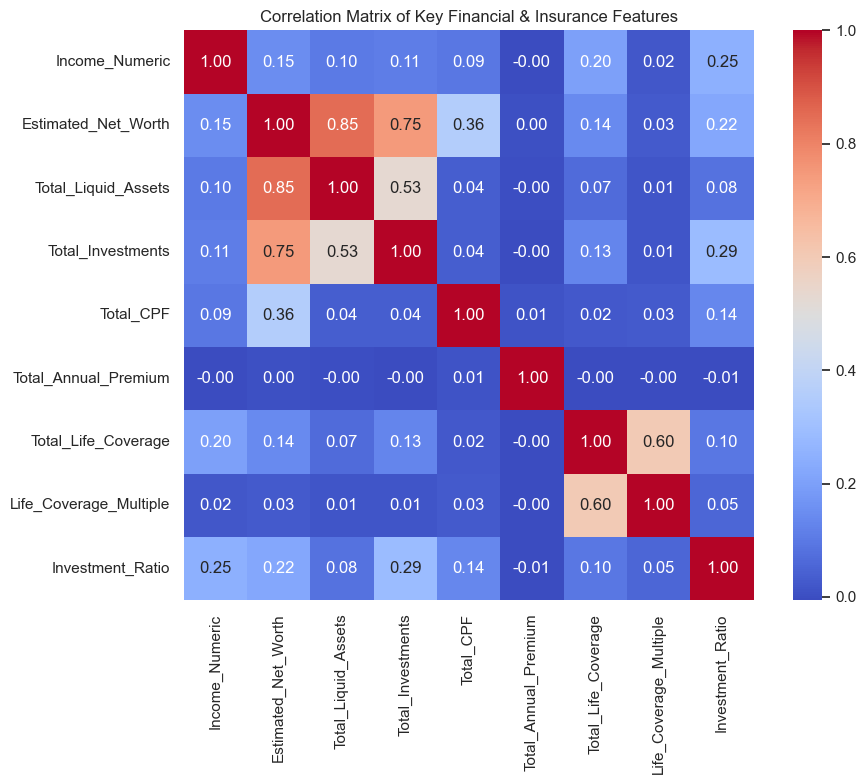

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('unified_client_dataset.xlsx')

print("📄 Dataset Loaded:")
print(f"   Records: {len(df):,}")
print(f"   Columns: {len(df.columns)}\n")

# Show first few rows
print("🔍 Sample rows:")
print(df.head())

# === Null value summary ===
print("\n🚨 Null values (Top 20 columns):")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0].sort_values(ascending=False)
print(nulls.head(20))

# === Descriptive statistics for numeric columns ===
print("\n📊 Numeric Summary:")
print(df.describe().T)

# === Categorical value counts (Top 10 most common) ===
print("\n🧮 Categorical Distribution Samples:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols[:5]:  # adjust if more desired
    print(f"\n-- {col} --")
    print(df[col].value_counts(dropna=False).head(10))

# === Insurance Portfolio Stats ===
if 'Has_Insurance' in df.columns:
    insured = df['Has_Insurance'].sum()
    print(f"\n🛡️ Clients with Insurance: {insured:,} ({insured / len(df) * 100:.1f}%)")

# === Correlation Heatmap for Key Features ===
key_cols = [
    'Income_Numeric', 'Estimated_Net_Worth', 'Total_Liquid_Assets',
    'Total_Investments', 'Total_CPF', 'Total_Annual_Premium',
    'Total_Life_Coverage', 'Life_Coverage_Multiple', 'Investment_Ratio'
]
available_cols = [col for col in key_cols if col in df.columns]

if available_cols:
    print(f"\n📈 Correlation Matrix for {len(available_cols)} Financial Features:")
    corr = df[available_cols].corr()
    print(corr)

    sns.set(style="white")
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Matrix of Key Financial & Insurance Features")
    plt.tight_layout()
    plt.show()


In [ ]:
# Layer 2 - Target Feature Analysis
# Goal: Join client features with product recommendation data to create ML training labels

In [3]:
print("=== PHASE 2: TARGET VARIABLE ENGINEERING (UPDATED) ===")
print("Goal: Join cleaned client features with product recommendations for ML training")

import pandas as pd
import numpy as np
from datetime import datetime

# ===== STEP 1: LOAD DATASETS =====
print("\n=== STEP 1: LOAD DATASETS ===")

def load_encrypted_excel(file_path: str, password: str) -> pd.DataFrame:
    import msoffcrypto
    import io
    with open(file_path, 'rb') as f:
        office_file = msoffcrypto.OfficeFile(f)
        office_file.load_key(password=password)
        decrypted = io.BytesIO()
        office_file.decrypt(decrypted)
        decrypted.seek(0)
        return pd.read_excel(decrypted)

# Load cleaned client dataset from Phase 1
clients_df = pd.read_excel('unified_client_dataset.xlsx')
print(f"✅ Loaded cleaned client dataset: {len(clients_df):,} unique clients")

# Load product and recommendation tables
product_tables = {
    'emfc2productsolution': 'mcZ4KQ$&d*?u',
    'ProductMainPlan': ')XQ4ZDssowrA', 
    'ProductType': '#9zCw?^-xTO?',
    'ProductCategory': '#F)cdAEOVJ@4',
    'productsubcategory': 'y-^t$N9>%S%C'
}

product_datasets = {}
for table_name, password in product_tables.items():
    try:
        product_datasets[table_name] = load_encrypted_excel(f"{table_name}.xlsx", password)
        print(f"✅ Loaded {table_name}: {len(product_datasets[table_name]):,} records")
    except Exception as e:
        print(f"❌ Failed to load {table_name}: {e}")

# ===== STEP 2: BUILD PRODUCT HIERARCHY =====
print("\n=== STEP 2: BUILD COMPLETE PRODUCT HIERARCHY ===")

# Build complete product hierarchy: ProductId → SubCategory → Category → Type
main_plans = product_datasets['ProductMainPlan']
subcategories = product_datasets['productsubcategory']
categories = product_datasets['ProductCategory']
product_types = product_datasets['ProductType']

# Step 2.1: ProductMainPlan → ProductSubCategory
products_with_subcat = main_plans.merge(
    subcategories[['ProductSubCategoryId', 'SubCategoryName', 'ProductCategoryId']], 
    on='ProductSubCategoryId', 
    how='left'
)

# Step 2.2: Add ProductCategory 
products_with_category = products_with_subcat.merge(
    categories[['ProductCategoryId', 'CategoryName', 'ProductTypeId']], 
    on='ProductCategoryId', 
    how='left'
)

# Step 2.3: Add ProductType (final hierarchy level)
complete_product_hierarchy = products_with_category.merge(
    product_types[['ProductTypeId', 'TypeName', 'InvestmentType']], 
    on='ProductTypeId', 
    how='left'
)

print(f"✅ Complete product hierarchy: {len(complete_product_hierarchy):,} products")
print(f"   Product levels: ProductId → SubCategory → Category → Type")

# Show hierarchy sample
hierarchy_sample = complete_product_hierarchy[
    ['ProductId', 'MainPlan', 'SubCategoryName', 'CategoryName', 'TypeName']
].head(5)
print(f"\n📋 PRODUCT HIERARCHY SAMPLE:")
print(hierarchy_sample.to_string(index=False))

# ===== STEP 3: ANALYZE TARGET VARIABLES =====
print("\n=== STEP 3: ANALYZE TARGET VARIABLES (SUBCATEGORIES) ===")

raw_recommendations = product_datasets['emfc2productsolution']
recommendations = raw_recommendations[raw_recommendations['Status'] == 'Approved'].copy()

print(f"📊 RECOMMENDATION DATA:")
print(f"   Total records: {len(raw_recommendations):,}")
print(f"   Approved recommendations: {len(recommendations):,}")


# Join recommendations with complete product hierarchy
recommendations_with_products = recommendations.merge(
    complete_product_hierarchy[['ProductId', 'SubCategoryName', 'CategoryName', 'TypeName']], 
    on='ProductId', 
    how='left'
)

print(f"   Recommendations with product info: {recommendations_with_products['SubCategoryName'].notna().sum():,}")

# Analyze subcategory distribution (our target variable)
subcat_distribution = recommendations_with_products['SubCategoryName'].value_counts()
print(f"\n🎯 PRODUCT SUBCATEGORY DISTRIBUTION (TOP 15):")
for i, (subcat, count) in enumerate(subcat_distribution.head(15).items(), 1):
    pct = (count / len(recommendations_with_products)) * 100
    print(f"   {i:2d}. {subcat}: {count:,} ({pct:.1f}%)")

print(f"\nTotal subcategories available: {subcat_distribution.nunique()}")

# ===== STEP 4: JOIN CLIENTS WITH RECOMMENDATIONS =====
print("\n=== STEP 4: JOIN CLIENT FEATURES WITH RECOMMENDATIONS ===")

# Enhanced joining strategy for deduplicated client data
print("🔗 JOINING STRATEGY:")
print("   Method: Multiple join attempts to maximize data preservation")

# Method 1: Direct PersonalInformationId join
join_method_1 = clients_df.merge(
    recommendations_with_products, 
    on='PersonalInformationId', 
    how='inner'
)
print(f"   Method 1 (PersonalInformationId): {len(join_method_1):,} recommendation records")

# Method 2: EMFC2FNAId join (alternative)
join_method_2 = clients_df.merge(
    recommendations_with_products, 
    on='EMFC2FNAId', 
    how='inner'
)
print(f"   Method 2 (EMFC2FNAId): {len(join_method_2):,} recommendation records")

# Choose best joining method
if len(join_method_1) > len(join_method_2):
    ml_training_data = join_method_1.copy()
    join_method = "PersonalInformationId"
else:
    ml_training_data = join_method_2.copy()
    join_method = "EMFC2FNAId"

print(f"✅ Selected join method: {join_method}")
print(f"   Final training records: {len(ml_training_data):,}")
print(f"   Unique clients in training data: {ml_training_data['ClientId'].nunique():,}")

# ===== STEP 5: PREPARE TARGET VARIABLE (SUBCATEGORIES) =====
print("\n=== STEP 5: PREPARE TARGET VARIABLE (SUBCATEGORIES) ===")

# Remove records without subcategory information
initial_count = len(ml_training_data)
ml_training_data = ml_training_data[ml_training_data['SubCategoryName'].notna()]
print(f"   Records with subcategory info: {len(ml_training_data):,} (removed {initial_count - len(ml_training_data):,})")

# Clean subcategory names for ML
def clean_subcategory_name(subcategory):
    if pd.isna(subcategory):
        return 'Unknown'
    
    # Clean and standardize subcategory names
    subcategory = str(subcategory).strip()
    
    # Replace spaces and special characters with underscores for ML compatibility
    subcategory = (subcategory.replace(' ', '_')
                             .replace('-', '_')
                             .replace('(', '')
                             .replace(')', '')
                             .replace('/', '_')
                             .replace('&', 'and')
                             .replace(',', ''))
    
    return subcategory

ml_training_data['Target_SubCategory'] = ml_training_data['SubCategoryName'].apply(clean_subcategory_name)

# Show final target distribution
final_target_dist = ml_training_data['Target_SubCategory'].value_counts()
print(f"\n📊 TARGET VARIABLE DISTRIBUTION (TOP 29):")
for i, (subcategory, count) in enumerate(final_target_dist.head(29).items(), 1):
    pct = (count / len(ml_training_data)) * 100
    print(f"   {i:2d}. {subcategory}: {count:,} ({pct:.1f}%)")

print(f"\nTotal subcategories: {final_target_dist.nunique()}")

# Class imbalance analysis
min_class_size = final_target_dist.min()
max_class_size = final_target_dist.max()
imbalance_ratio = max_class_size / min_class_size

print(f"\n⚖️  CLASS BALANCE ANALYSIS:")
print(f"   Smallest class: {min_class_size:,} samples")
print(f"   Largest class: {max_class_size:,} samples")
print(f"   Imbalance ratio: {imbalance_ratio:.1f}:1")

# ===== STEP 6: FEATURE QUALITY ASSESSMENT =====
print("\n=== STEP 6: FEATURE QUALITY ASSESSMENT (POST-JOIN) ===")

# Key ML features to assess
ml_features = [
    # Demographics
    'ClientAge', 'ClientGender', 'Nationality', 'MaritalStatus',
    # Socioeconomic
    'IncomeRange', 'Income_Numeric', 'Education', 'EmploymentStatus',
    # Financial
    'Total_Liquid_Assets', 'Total_Investments', 'Estimated_Net_Worth', 'Investment_Ratio',
    # Insurance Portfolio (NEW from Phase 1)
    'Has_Insurance', 'Life_Coverage_Multiple', 'Insurance_Sophistication',
    # Risk & Derived
    'RiskProfile', 'Life_Stage', 'Financial_Sophistication'
]

print("🔍 FEATURE QUALITY CHECK:")
feature_quality_report = []

for feature in ml_features:
    if feature in ml_training_data.columns:
        total_records = len(ml_training_data)
        missing_count = ml_training_data[feature].isnull().sum()
        missing_pct = (missing_count / total_records) * 100
        unique_count = ml_training_data[feature].nunique()
        
        status = "EXCELLENT" if missing_pct < 10 else "GOOD" if missing_pct < 30 else "REVIEW" if missing_pct < 50 else "POOR"
        
        feature_quality_report.append({
            'Feature': feature,
            'Missing_%': round(missing_pct, 1),
            'Unique_Values': unique_count,
            'Status': status
        })
        
        print(f"   {feature}: {missing_pct:.1f}% missing, {unique_count} unique - {status}")
    else:
        print(f"   {feature}: ❌ Not found in dataset")

# ===== STEP 7: HANDLE SMALL SUBCATEGORIES =====
print("\n=== STEP 7: HANDLE SMALL SUBCATEGORIES ===")

min_samples_threshold = 50  # Minimum samples for stable ML training
small_subcategories = final_target_dist[final_target_dist < min_samples_threshold]

print(f"📊 SUBCATEGORIES WITH <{min_samples_threshold} SAMPLES: {len(small_subcategories)}")
if len(small_subcategories) > 0:
    print("Small subcategories:")
    for subcat, count in small_subcategories.items():
        print(f"   {subcat}: {count} samples")
    
    # Remove small subcategories for model stability
    ml_training_clean = ml_training_data[
        ~ml_training_data['Target_SubCategory'].isin(small_subcategories.index)
    ].copy()
    
    print(f"\n✂️  FILTERING RESULTS:")
    print(f"   Original records: {len(ml_training_data):,}")
    print(f"   After filtering: {len(ml_training_clean):,}")
    print(f"   Remaining subcategories: {ml_training_clean['Target_SubCategory'].nunique()}")
else:
    ml_training_clean = ml_training_data.copy()
    print("   ✅ All subcategories have sufficient samples")

# ===== STEP 8: PREPARE FINAL ML FEATURES =====
print("\n=== STEP 8: PREPARE FINAL ML DATASET ===")

# Define final feature set including new insurance portfolio features
final_feature_set = [
    # Demographics
    'ClientAge', 'ClientGender', 'Nationality', 'MaritalStatus',
    # Socioeconomic  
    'IncomeRange', 'Income_Numeric', 'Income_Category', 'Education', 'EmploymentStatus',
    # Financial Profile
    'Total_Liquid_Assets', 'Total_Investments', 'Total_CPF', 'Estimated_Net_Worth', 'Investment_Ratio',
    # Insurance Portfolio (Enhanced from Phase 1)
    'Has_Insurance', 'Life_Coverage_Multiple', 'Premium_to_Income_Ratio', 
    'Insurance_Sophistication', 'Life_Coverage_Gap', 'CI_Coverage_Gap',
    # Risk Assessment
    'RiskProfile', 'CKAProfile', 'CARProfile',
    # Derived Features
    'Life_Stage', 'Financial_Sophistication', 'Age_Group',
    # Target Variable
    'Target_SubCategory',
    # Context (optional)
    'AIProduct', 'DateCreated'
]

# Filter to available features
available_features = [col for col in final_feature_set if col in ml_training_clean.columns]
final_ml_dataset = ml_training_clean[available_features].copy()

print(f"📊 FINAL FEATURE SET:")
print(f"   Requested features: {len(final_feature_set)}")
print(f"   Available features: {len(available_features)}")
print(f"   Final dataset: {len(final_ml_dataset):,} records")

missing_features = [col for col in final_feature_set if col not in ml_training_clean.columns]
if missing_features:
    print(f"   Missing features: {missing_features}")

# ===== STEP 9: CREATE BALANCED SAMPLE =====
print("\n=== STEP 9: CREATE BALANCED SAMPLE FOR DEVELOPMENT ===")

max_samples_per_class = 2000  # Increased from 1000 due to better data quality
balanced_samples = []

print(f"🔧 CREATING BALANCED SAMPLE (max {max_samples_per_class} per subcategory):")

subcategory_counts = final_ml_dataset['Target_SubCategory'].value_counts()
for subcategory in subcategory_counts.index:
    subcat_data = final_ml_dataset[final_ml_dataset['Target_SubCategory'] == subcategory]
    
    if len(subcat_data) > max_samples_per_class:
        sampled = subcat_data.sample(n=max_samples_per_class, random_state=42)
    else:
        sampled = subcat_data.copy()
    
    balanced_samples.append(sampled)
    print(f"   {subcategory}: {len(sampled):,} samples")

balanced_training_data = pd.concat(balanced_samples, ignore_index=True)

# ===== STEP 10: SAVE ML TRAINING DATASETS =====
print("\n=== STEP 10: SAVE ML TRAINING DATASETS ===")

# Dataset 1: Full subcategory dataset (real distribution)
final_ml_dataset.to_excel('ML_TRAINING_SUBCATEGORIES_FULL_V2.xlsx', index=False)
print(f"💾 SAVED: ML_TRAINING_SUBCATEGORIES_FULL_V2.xlsx")
print(f"   Records: {len(final_ml_dataset):,}")
print(f"   Subcategories: {final_ml_dataset['Target_SubCategory'].nunique()}")
print(f"   Features: {len(available_features) - 1}")  # Exclude target

# Dataset 2: Balanced subcategory dataset (for development)
balanced_training_data.to_excel('ML_TRAINING_SUBCATEGORIES_BALANCED_V2.xlsx', index=False)
print(f"💾 SAVED: ML_TRAINING_SUBCATEGORIES_BALANCED_V2.xlsx")
print(f"   Records: {len(balanced_training_data):,}")
print(f"   Subcategories: {balanced_training_data['Target_SubCategory'].nunique()}")

# ===== STEP 11: FINAL SUMMARY REPORT =====
print("\n=== STEP 11: FINAL SUMMARY REPORT ===")

# Create comprehensive summary
summary_stats = {
    'Phase_Status': 'Phase 2 Complete',
    'ML_Problem_Type': 'Multi-class Classification (Subcategory Prediction)',
    'Business_Objective': 'Predict top 1-3 subcategories with confidence scores',
    'Join_Method_Used': join_method,
    'Total_Training_Records': len(final_ml_dataset),
    'Unique_Clients': final_ml_dataset['ClientId'].nunique() if 'ClientId' in final_ml_dataset.columns else 'N/A',
    'Subcategories_Count': final_ml_dataset['Target_SubCategory'].nunique(),
    'Features_Available': len(available_features) - 1,
    'Top_Subcategory': f"{subcategory_counts.index[0]} ({subcategory_counts.iloc[0]:,} samples)",
    'Data_Quality': 'Enhanced from Phase 1 cleaning',
    'Insurance_Features': 'Integrated from portfolio analysis',
    'Imbalance_Ratio': f"{subcategory_counts.max() / subcategory_counts.min():.0f}:1"
}

print(f"📋 PHASE 2 COMPLETION SUMMARY:")
for key, value in summary_stats.items():
    print(f"   {key}: {value}")

# Save summary report
with open('PHASE_2_COMPLETION_REPORT.txt', 'w') as f:
    f.write("=== PHASE 2: TARGET VARIABLE ENGINEERING - COMPLETION REPORT ===\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    
    f.write("MODEL SPECIFICATION:\n")
    f.write("Problem Type: Multi-class Classification\n")
    f.write("Target Variable: Product Subcategories\n")
    f.write("Model Output: Top 1-3 subcategories with confidence scores\n")
    f.write("Business Use: Starting point for FNA discussions\n\n")
    
    f.write("DATASET STATISTICS:\n")
    for key, value in summary_stats.items():
        f.write(f"{key}: {value}\n")
    
    f.write(f"\nSUBCATEGORY DISTRIBUTION:\n")
    for i, (subcat, count) in enumerate(subcategory_counts.head(10).items(), 1):
        pct = (count / len(final_ml_dataset)) * 100
        f.write(f"{i:2d}. {subcat}: {count:,} ({pct:.1f}%)\n")
    
    f.write(f"\nFEATURE QUALITY:\n")
    excellent_features = [f['Feature'] for f in feature_quality_report if f['Status'] == 'EXCELLENT']
    good_features = [f['Feature'] for f in feature_quality_report if f['Status'] == 'GOOD']
    review_features = [f['Feature'] for f in feature_quality_report if f['Status'] in ['REVIEW', 'POOR']]
    
    f.write(f"Excellent Quality: {excellent_features}\n")
    f.write(f"Good Quality: {good_features}\n")
    f.write(f"Review Needed: {review_features}\n")

print(f"💾 SAVED: PHASE_2_COMPLETION_REPORT.txt")

print(f"\n🎉 PHASE 2 COMPLETE!")
print(f"✅ Enhanced client dataset successfully joined with product recommendations")
print(f"✅ Target variable: {final_ml_dataset['Target_SubCategory'].nunique()} product subcategories")
print(f"✅ Training datasets: Full + Balanced versions created")
print(f"✅ Insurance portfolio features integrated from Phase 1")
print(f"✅ Data quality: Significantly improved from Phase 1 cleaning")

print(f"\n📁 FILES CREATED:")
print(f"   • ML_TRAINING_SUBCATEGORIES_FULL_V2.xlsx (real distribution)")
print(f"   • ML_TRAINING_SUBCATEGORIES_BALANCED_V2.xlsx (development)")
print(f"   • PHASE_2_COMPLETION_REPORT.txt (comprehensive documentation)")

print(f"\n🎯 READY FOR PHASE 3:")
print(f"   Phase 3: Feature selection + Model training + Evaluation")
print(f"   Goal: Build model that predicts top 1-3 subcategories with confidence scores")
print(f"   Advantage: Enhanced insurance portfolio features for better recommendations")

=== PHASE 2: TARGET VARIABLE ENGINEERING (UPDATED) ===
Goal: Join cleaned client features with product recommendations for ML training

=== STEP 1: LOAD DATASETS ===
✅ Loaded cleaned client dataset: 64,531 unique clients
✅ Loaded emfc2productsolution: 61,733 records
✅ Loaded ProductMainPlan: 1,532 records
✅ Loaded ProductType: 4 records
✅ Loaded ProductCategory: 10 records
✅ Loaded productsubcategory: 39 records

=== STEP 2: BUILD COMPLETE PRODUCT HIERARCHY ===
✅ Complete product hierarchy: 1,532 products
   Product levels: ProductId → SubCategory → Category → Type

📋 PRODUCT HIERARCHY SAMPLE:
                           ProductId                         MainPlan SubCategoryName        CategoryName       TypeName
104437ec-82ad-4ba7-8c2c-8b6a11be31b2            Group Deluxe Medical  Customised Plan   Employee Benefits          Group
ae9ab759-6cc1-4ecb-8070-f5fd24ed5d5c        Group Hospital & Surgical Customised Plan   Employee Benefits          Group
d9a6c047-04d9-48dc-bd52-1a406b1f77f4

In [ ]:
print("=== PHASE 3: ML MODEL TRAINING & OPTIMIZATION ===")
print("Goal: Build subcategory prediction model with top-k confidence scores")

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ===== STEP 1: LOAD AND ANALYZE TRAINING DATA =====
print("\n=== STEP 1: LOAD AND ANALYZE TRAINING DATA ===")

# Load both datasets
full_data = pd.read_excel('ML_TRAINING_SUBCATEGORIES_FULL_V2.xlsx')
balanced_data = pd.read_excel('ML_TRAINING_SUBCATEGORIES_BALANCED_V2.xlsx')

print(f"✅ Full dataset: {len(full_data):,} records, {full_data['Target_SubCategory'].nunique()} classes")
print(f"✅ Balanced dataset: {len(balanced_data):,} records, {balanced_data['Target_SubCategory'].nunique()} classes")

# Analyze class distribution
print(f"\n📊 CLASS DISTRIBUTION ANALYSIS:")
full_dist = full_data['Target_SubCategory'].value_counts()
balanced_dist = balanced_data['Target_SubCategory'].value_counts()

print(f"   Full dataset - Most common: {full_dist.iloc[0]:,}, Least common: {full_dist.iloc[-1]:,}")
print(f"   Balanced dataset - Most common: {balanced_dist.iloc[0]:,}, Least common: {balanced_dist.iloc[-1]:,}")
print(f"   Imbalance ratio - Full: {full_dist.iloc[0]/full_dist.iloc[-1]:.0f}:1, Balanced: {balanced_dist.iloc[0]/balanced_dist.iloc[-1]:.0f}:1")

# ===== STEP 2: FEATURE ENGINEERING FOR ML =====
print("\n=== STEP 2: FEATURE ENGINEERING FOR ML ===")

def prepare_ml_features(df):
    """Prepare features for ML training with proper encoding"""
    
    print(f"🔧 Preparing features for {len(df):,} records...")
    
    # Define feature categories based on Phase 2 success
    categorical_features = [
        'ClientGender', 'Nationality', 'MaritalStatus', 'IncomeRange', 
        'Education', 'EmploymentStatus', 'RiskProfile',
        'Insurance_Sophistication', 'Life_Stage', 'Financial_Sophistication'
    ]
    
    numerical_features = [
        'ClientAge', 'Income_Numeric', 'Total_Liquid_Assets', 'Total_Investments',
        'Total_CPF', 'Estimated_Net_Worth', 'Investment_Ratio',
        'Life_Coverage_Multiple', 'Premium_to_Income_Ratio'
    ]
    
    binary_features = [
        'Has_Insurance', 'Life_Coverage_Gap', 'CI_Coverage_Gap'
    ]
    
    # Create feature matrix
    X = pd.DataFrame(index=df.index)
    feature_info = {}
    
    # Add numerical features
    print(f"   📊 Processing {len(numerical_features)} numerical features...")
    for feature in numerical_features:
        if feature in df.columns:
            # Handle missing values with median
            median_val = df[feature].median()
            X[feature] = df[feature].fillna(median_val)
            feature_info[feature] = {'type': 'numerical', 'median': median_val}
        else:
            print(f"   ⚠️  Missing feature: {feature}")
    
    # Add binary features
    print(f"   🔘 Processing {len(binary_features)} binary features...")
    for feature in binary_features:
        if feature in df.columns:
            X[feature] = df[feature].fillna(0).astype(int)
            feature_info[feature] = {'type': 'binary'}
    
    # Encode categorical features
    print(f"   🏷️  Processing {len(categorical_features)} categorical features...")
    label_encoders = {}
    for feature in categorical_features:
        if feature in df.columns:
            # Handle missing values
            feature_data = df[feature].fillna('Unknown').astype(str)
            
            # Create and fit label encoder
            le = LabelEncoder()
            X[feature] = le.fit_transform(feature_data)
            label_encoders[feature] = le
            feature_info[feature] = {
                'type': 'categorical', 
                'classes': list(le.classes_),
                'n_classes': len(le.classes_)
            }
        else:
            print(f"   ⚠️  Missing categorical feature: {feature}")
    
    # Target variable encoding
    target_encoder = LabelEncoder()
    y = target_encoder.fit_transform(df['Target_SubCategory'])
    
    print(f"   ✅ Feature matrix created: {X.shape}")
    print(f"   ✅ Target encoded: {len(target_encoder.classes_)} classes")
    
    return X, y, label_encoders, target_encoder, feature_info

# Prepare features for both datasets
print(f"\n🔄 PREPARING FULL DATASET...")
X_full, y_full, encoders_full, target_encoder_full, feature_info_full = prepare_ml_features(full_data)

print(f"\n🔄 PREPARING BALANCED DATASET...")
X_balanced, y_balanced, encoders_balanced, target_encoder_balanced, feature_info_balanced = prepare_ml_features(balanced_data)

print(f"\n✅ FEATURE PREPARATION COMPLETE:")
print(f"   Full dataset: {X_full.shape[0]:,} samples, {X_full.shape[1]} features")
print(f"   Balanced dataset: {X_balanced.shape[0]:,} samples, {X_balanced.shape[1]} features")
print(f"   Target classes: {len(target_encoder_full.classes_)}")

# ===== STEP 3: FEATURE IMPORTANCE ANALYSIS =====
print("\n=== STEP 3: FEATURE IMPORTANCE ANALYSIS ===")

# Use balanced dataset for feature importance to avoid bias
print(f"🔍 Analyzing feature importance using balanced dataset...")

# Quick Random Forest for feature importance
rf_importance = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1,
    class_weight='balanced'
)

# Fit on balanced data
rf_importance.fit(X_balanced, y_balanced)

# Calculate feature importance
feature_importance = pd.DataFrame({
    'Feature': X_balanced.columns,
    'Importance': rf_importance.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🏆 TOP 15 MOST IMPORTANT FEATURES:")
for i, (_, row) in enumerate(feature_importance.head(15).iterrows(), 1):
    print(f"   {i:2d}. {row['Feature']:<25}: {row['Importance']:.4f}")

# Select top features for modeling
top_features = feature_importance.head(20)['Feature'].tolist()
print(f"\n✅ Selected top {len(top_features)} features for modeling")

# ===== STEP 4: TRAIN-TEST SPLIT STRATEGY =====
print("\n=== STEP 4: TRAIN-TEST SPLIT STRATEGY ===")

# Split both datasets
print(f"📊 Creating train-test splits...")

# Full dataset split (80-20)
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full[top_features], y_full, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_full
)

# Balanced dataset split (80-20)
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(
    X_balanced[top_features], y_balanced, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_balanced
)

print(f"✅ TRAIN-TEST SPLITS CREATED:")
print(f"   Full dataset - Train: {len(X_full_train):,}, Test: {len(X_full_test):,}")
print(f"   Balanced dataset - Train: {len(X_bal_train):,}, Test: {len(X_bal_test):,}")

# ===== STEP 5: MODEL TRAINING & COMPARISON =====
print("\n=== STEP 5: MODEL TRAINING & COMPARISON ===")

# Define models to compare
models_config = {
    'Random Forest (Balanced)': {
        'model': RandomForestClassifier(
            n_estimators=200,
            max_depth=15,
            min_samples_split=10,
            min_samples_leaf=5,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ),
        'dataset': 'balanced'
    },
    'Random Forest (Full)': {
        'model': RandomForestClassifier(
            n_estimators=200,
            max_depth=20,
            min_samples_split=20,
            min_samples_leaf=10,
            class_weight='balanced_subsample',
            random_state=42,
            n_jobs=-1
        ),
        'dataset': 'full'
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=8,
            min_samples_split=20,
            min_samples_leaf=10,
            random_state=42
        ),
        'dataset': 'balanced'
    }
}

# Train and evaluate models
model_results = {}
trained_models = {}

print(f"🔧 TRAINING {len(models_config)} MODELS...")

for model_name, config in models_config.items():
    print(f"\n🔄 Training {model_name}...")
    
    # Select appropriate dataset
    if config['dataset'] == 'balanced':
        X_train, X_test, y_train, y_test = X_bal_train, X_bal_test, y_bal_train, y_bal_test
    else:
        X_train, X_test, y_train, y_test = X_full_train, X_full_test, y_full_train, y_full_test
    
    # Train model
    model = config['model']
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Top-k accuracy calculation
    def top_k_accuracy(y_true, y_pred_proba, k=3):
        top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
        return np.mean([y_true[i] in top_k_preds[i] for i in range(len(y_true))])
    
    top1_acc = accuracy
    top3_acc = top_k_accuracy(y_test, y_pred_proba, k=3)
    
    # Store results
    model_results[model_name] = {
        'accuracy': accuracy,
        'top1_accuracy': top1_acc,
        'top3_accuracy': top3_acc,
        'dataset_used': config['dataset'],
        'train_size': len(X_train),
        'test_size': len(X_test)
    }
    
    trained_models[model_name] = model
    
    print(f"   ✅ {model_name}:")
    print(f"      Top-1 Accuracy: {top1_acc:.4f} ({top1_acc*100:.1f}%)")
    print(f"      Top-3 Accuracy: {top3_acc:.4f} ({top3_acc*100:.1f}%)")
    print(f"      Dataset: {config['dataset']} ({len(X_train):,} train samples)")

# ===== STEP 6: SELECT BEST MODEL =====
print("\n=== STEP 6: SELECT BEST MODEL ===")

# Compare models
results_df = pd.DataFrame(model_results).T
print(f"🏆 MODEL COMPARISON:")
print(results_df[['top1_accuracy', 'top3_accuracy', 'dataset_used']].round(4))

# Select best model based on top-3 accuracy (business priority)
best_model_name = results_df['top3_accuracy'].idxmax()
best_model = trained_models[best_model_name]
best_results = model_results[best_model_name]

print(f"\n🥇 BEST MODEL SELECTED: {best_model_name}")
print(f"   Top-1 Accuracy: {best_results['top1_accuracy']:.4f} ({best_results['top1_accuracy']*100:.1f}%)")
print(f"   Top-3 Accuracy: {best_results['top3_accuracy']:.4f} ({best_results['top3_accuracy']*100:.1f}%)")

# ===== STEP 7: CALIBRATE PROBABILITIES =====
print("\n=== STEP 7: CALIBRATE PROBABILITIES FOR CONFIDENCE SCORES ===")

# Use appropriate dataset for best model
if best_results['dataset_used'] == 'balanced':
    X_train, X_test, y_train, y_test = X_bal_train, X_bal_test, y_bal_train, y_bal_test
else:
    X_train, X_test, y_train, y_test = X_full_train, X_full_test, y_full_train, y_full_test

# Calibrate probabilities using Platt scaling
print(f"🎯 Calibrating probabilities for better confidence scores...")
calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid', cv=3)
calibrated_model.fit(X_train, y_train)

# Test calibrated model
cal_pred_proba = calibrated_model.predict_proba(X_test)
cal_top3_acc = top_k_accuracy(y_test, cal_pred_proba, k=3)

print(f"✅ Calibrated model Top-3 accuracy: {cal_top3_acc:.4f} ({cal_top3_acc*100:.1f}%)")

# ===== STEP 8: CREATE PREDICTION FUNCTION =====
print("\n=== STEP 8: CREATE PREDICTION FUNCTION ===")

def predict_top_subcategories(client_features, model, target_encoder, top_features, k=3):
    """
    Predict top-k subcategories with confidence scores for a client
    
    Args:
        client_features: DataFrame with client features
        model: Trained model
        target_encoder: Target label encoder
        top_features: List of selected features
        k: Number of top predictions to return
    
    Returns:
        List of tuples (subcategory, confidence_score)
    """
    
    # Ensure features are in correct order
    X_pred = client_features[top_features]
    
    # Get prediction probabilities
    pred_proba = model.predict_proba(X_pred)[0]
    
    # Get top-k predictions
    top_k_indices = np.argsort(pred_proba)[-k:][::-1]
    top_k_subcategories = target_encoder.inverse_transform(top_k_indices)
    top_k_confidences = pred_proba[top_k_indices]
    
    # Return as list of tuples
    return [(subcat, conf) for subcat, conf in zip(top_k_subcategories, top_k_confidences)]

print(f"✅ Prediction function created")

# ===== STEP 9: TEST PREDICTION FUNCTION =====
print("\n=== STEP 9: TEST PREDICTION FUNCTION ===")

# Test with a few samples
print(f"🧪 Testing prediction function with sample clients...")

# Select appropriate encoder and test data
if best_results['dataset_used'] == 'balanced':
    target_encoder = target_encoder_balanced
    test_features = X_bal_test
    test_targets = y_bal_test
else:
    target_encoder = target_encoder_full
    test_features = X_full_test
    test_targets = y_full_test

# Test with first 3 samples
for i in range(min(10, len(test_features))):
    print(f"\n📋 Sample Client {i+1}:")
    
    # Get client features
    client_features = test_features.iloc[[i]]
    actual_subcategory = target_encoder.inverse_transform([test_targets[i]])[0]
    
    # Make prediction
    predictions = predict_top_subcategories(
        client_features, calibrated_model, target_encoder, top_features, k=3
    )
    
    print(f"   Actual: {actual_subcategory}")
    print(f"   Predictions:")
    for j, (subcat, conf) in enumerate(predictions, 1):
        print(f"      {j}. {subcat}: {conf:.3f} ({conf*100:.1f}%)")
    
    # Check if actual is in top-3
    predicted_subcats = [pred[0] for pred in predictions]
    hit = "✅ HIT" if actual_subcategory in predicted_subcats else "❌ MISS"
    print(f"   Result: {hit}")

# ===== STEP 10: SAVE MODEL AND ARTIFACTS =====
print("\n=== STEP 10: SAVE MODEL AND ARTIFACTS ===")

# Create model package
model_package = {
    'model': calibrated_model,
    'target_encoder': target_encoder,
    'feature_encoders': encoders_balanced if best_results['dataset_used'] == 'balanced' else encoders_full,
    'top_features': top_features,
    'feature_info': feature_info_balanced if best_results['dataset_used'] == 'balanced' else feature_info_full,
    'model_performance': best_results,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model_name': best_model_name
}

# Save model package
joblib.dump(model_package, 'SUBCATEGORY_PREDICTION_MODEL_V1.pkl')
print(f"💾 SAVED: SUBCATEGORY_PREDICTION_MODEL_V1.pkl")

# Save feature importance
feature_importance.to_excel('MODEL_FEATURE_IMPORTANCE_V1.xlsx', index=False)
print(f"💾 SAVED: MODEL_FEATURE_IMPORTANCE_V1.xlsx")

# Save model performance report
performance_report = {
    'Model Type': best_model_name,
    'Training Dataset': best_results['dataset_used'],
    'Training Samples': best_results['train_size'],
    'Test Samples': best_results['test_size'],
    'Top-1 Accuracy': f"{best_results['top1_accuracy']:.4f} ({best_results['top1_accuracy']*100:.1f}%)",
    'Top-3 Accuracy': f"{best_results['top3_accuracy']:.4f} ({best_results['top3_accuracy']*100:.1f}%)",
    'Calibrated Top-3 Accuracy': f"{cal_top3_acc:.4f} ({cal_top3_acc*100:.1f}%)",
    'Number of Features': len(top_features),
    'Number of Classes': len(target_encoder.classes_),
    'Training Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('MODEL_PERFORMANCE_REPORT_V1.txt', 'w') as f:
    f.write("=== PHASE 3: ML MODEL PERFORMANCE REPORT ===\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    
    f.write("MODEL SPECIFICATIONS:\n")
    for key, value in performance_report.items():
        f.write(f"{key}: {value}\n")
    
    f.write(f"\nTOP 10 FEATURE IMPORTANCE:\n")
    for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
        f.write(f"{i:2d}. {row['Feature']}: {row['Importance']:.4f}\n")
    
    f.write(f"\nTARGET CLASSES:\n")
    for i, class_name in enumerate(target_encoder.classes_, 1):
        f.write(f"{i:2d}. {class_name}\n")

print(f"💾 SAVED: MODEL_PERFORMANCE_REPORT_V1.txt")

# ===== STEP 11: FINAL SUMMARY =====
print("\n=== STEP 11: PHASE 3 COMPLETION SUMMARY ===")

print(f"🎉 PHASE 3 COMPLETE!")
print(f"✅ Best Model: {best_model_name}")
print(f"✅ Top-1 Accuracy: {best_results['top1_accuracy']*100:.1f}%")
print(f"✅ Top-3 Accuracy: {best_results['top3_accuracy']*100:.1f}%")
print(f"✅ Calibrated Confidence Scores: Available")
print(f"✅ Business-Ready: Predicts 1-3 subcategories with confidence")

print(f"\n📁 FILES CREATED:")
print(f"   • SUBCATEGORY_PREDICTION_MODEL_V1.pkl (complete model package)")
print(f"   • MODEL_FEATURE_IMPORTANCE_V1.xlsx (feature analysis)")
print(f"   • MODEL_PERFORMANCE_REPORT_V1.txt (performance documentation)")

print(f"\n🎯 MODEL READY FOR DEPLOYMENT:")
print(f"   • Input: Client demographic + financial + insurance features")
print(f"   • Output: Top 1-3 subcategory recommendations with confidence scores")
print(f"   • Business Use: FNA discussion starting points")
print(f"   • Confidence Calibration: Reliable probability scores")

print(f"\n🚀 READY FOR PHASE 4: Business Validation & Deployment Strategy")

# Example usage snippet
print(f"\n💡 EXAMPLE USAGE:")
print(f"""
# Load model
import joblib
model_package = joblib.load('SUBCATEGORY_PREDICTION_MODEL_V1.pkl')

# Make prediction for new client
client_data = pd.DataFrame({...})  # Client features
predictions = predict_top_subcategories(
    client_data, 
    model_package['model'], 
    model_package['target_encoder'], 
    model_package['top_features'],
    k=3
)

# Results: [(subcategory, confidence), ...]
""")

=== PHASE 3: ML MODEL TRAINING & OPTIMIZATION ===
Goal: Build subcategory prediction model with top-k confidence scores

=== STEP 1: LOAD AND ANALYZE TRAINING DATA ===
✅ Full dataset: 41,571 records, 15 classes
✅ Balanced dataset: 16,614 records, 15 classes

📊 CLASS DISTRIBUTION ANALYSIS:
   Full dataset - Most common: 12,878, Least common: 63
   Balanced dataset - Most common: 2,000, Least common: 63
   Imbalance ratio - Full: 204:1, Balanced: 32:1

=== STEP 2: FEATURE ENGINEERING FOR ML ===

🔄 PREPARING FULL DATASET...
🔧 Preparing features for 41,571 records...
   📊 Processing 9 numerical features...
   🔘 Processing 3 binary features...
   🏷️  Processing 10 categorical features...
   ✅ Feature matrix created: (41571, 22)
   ✅ Target encoded: 15 classes

🔄 PREPARING BALANCED DATASET...
🔧 Preparing features for 16,614 records...
   📊 Processing 9 numerical features...
   🔘 Processing 3 binary features...
   🏷️  Processing 10 categorical features...
   ✅ Feature matrix created: (16614, 